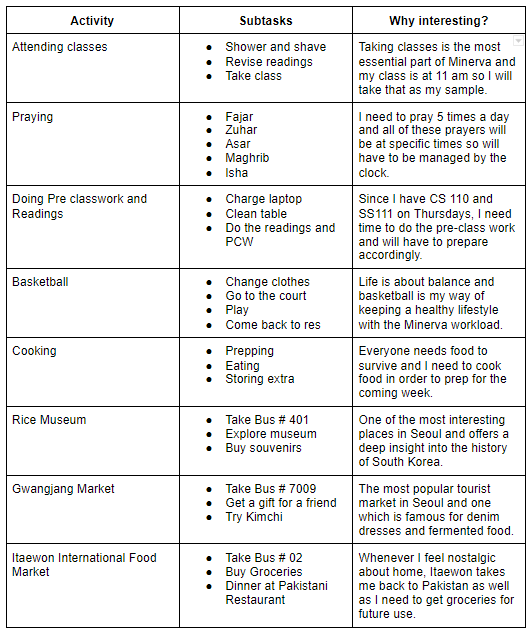

In [1]:
from IPython.display import Image
Image('Table of tasks.png')
#the last 3 tasks are the cultural immersion tasks and the first 5 are everyday tasks

The table above shows the activities that I have set out for the daily planner. I am taking a general Monday as an example
as it is the first day of the week and the acitvities that I have to do give a general overview into the Minervan life as 
well as providing insights into it. 
Things like classes, doing pre class work, basketball, cooking, and praying are a part of my everyday life which are daily routine acitivities divided into subtasks.
Rice Museum, Gwangjang market, and Itaewon International Food Market are three cultural attractions in Seoul with the Rice Museum being the source of a journey down South Korea's food & celebration history. Similarly, Gwangjang market is the
tourist market which is known for cheap clothes and in particular fermented food like Kimchi which are very central to the
South Korean culture. Lastly, Itaewon is the biggest international district in Seoul and a trip to this place is like a trip through many countries at the same time. Restaurants offer various cousines ranging from Turksih to Subcontinental which is a great way to escape the reality of being in Seoul and sometimes just take a step back to go back home and feel like being back in Pakistan again.

The way the data will be stored is through using a priority queue data structure. It takes the input and based on the priority will queue the task being passed to it. The tasks will be passed in the form of arrays with all the attributes required.
The tasks are connected to their subtasks by declaring everything as tasks but then assigning the main tasks maximum priority and assigning them dependencies on the subtasks they have so that the priority queue marks them as complete as soon as the subtasks associated with the tasks are completed.
A priority queue is an abstract data structure i.e. a data structure that is defined by its behavior in which each item has a special "key" assigned as its priority. It will use the tasks as "items" and the priorities as "keys".
Although python does not show this implementation, the program basically allocates pointers in the memory for the program in order to manage the priority queue as this allows for easier management of the data structure. The pointers are analogous to "guiding strings." When we pass tasks, they will be declared on the memory in the form of arrays. However, it is impossible to declare all the tasks on the stacks as there is not enough memory available there. Thus, the arrays are declared on the memory heap and then pointers which are basically memory addresses stored on the stacks. Similarly, pointers responsible for managing the priority queue like a pointer for the head(highest priority), a pointer for the tail(least priority) and one pointer to keep track of the current position in the queue so that the program knows which task to perform. These "guiding strings" to location in memory allow the program to work effciently in terms of accessing the memory and also not causing a stack overflow. This is how the priority queue works in practice.

The priority queue will queue these tasks based on the assigned priority which is different from the standard queue as in the case that if we were to output the passed tasks we would get the tasks in the order of priority assigned and not like the standard queue which just follows a "First In First Out" approach giving the output in the same order as they were passed. Similarly, if two task with the same priority are passed, the priority queue acts as the standard queue meaning the tasks are queued in the same order as they were passed.
A priority queue is well-suited to the problem because it allows the sorting of the tasks based on priorities and this leads to the task scheduler being able to carry out its intended function of scheduling a day. Moreover, being an abstract data structure means that the priority queue can be programmed to function the way we want it to which gives us an ideal data structure for these scenarios. Furthermore, a priority queue is able to keep track of the tasks that are yet to be started, the ones that are in process, their progress, the ones that have been completed, and the ones that it are supposed to be initiated first as soon as the dependencies for the task are complete which can not be found in a static data type/structure.
For assigning priorities I am using a scale of 1-20 as I feel like this would be a good enough scale for all the tasks that will be inputed. The maximum priority(20) is only for the main 8 tasks and will only be so that they can be marked as complete when the subtasks associated with them have been completed. The other priorities will be associated with the other tasks.
The priority is based on academic priority so the academic stuff like taking class and doing the pre class readings for the next class take the highest priority. The other activities follow suit in this case in the respective order: Rice Museum because it closes, Gwangjang market since it is close to the Rice Museum, Itaewon Grocery shopping as all these tasks can be completed while I am out of the res together. Basketball follows and then the last activity of the day would be the cooking part because it is not constrained by anything. The prayers are like class timings to be performed at specific timings of the day which will be based on the clock I use.
Moreover, the priorties will be mathematically handled so that the tasks that do not have any dependencies are the ones that are completed first or at least given higher priority as they can be completed easily. This can be done by checking the priority of each task at the start and then incrementing the priority of the tasks that do not have any dependencies by a certain amount in order to bring this about in practice. The second thing we should consider is whether there is a task that needs to be done at a certain time in which case it must take maximum priority at the given time in order to complete it at the required time. 
Once these calculations are done, the task scheduler can be run in order to schedule the tasks in a way that is most efficient for the time while also making sure that all the constraints of the priorities are followed along with it. 

In [2]:
class MinHeapq():  
    
    def __init__(self):     
        """
        Initializes the instance of the class
        """
        self.heap = []
        self.heap_size  = 0
   
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
    
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1) // 2
        
    def mink(self):    
        """
        Returns the first value of the heap i.e. the smallest value of the heap
        """
        #the first value of the heap is the smallest value according to the heap property
        return self.heap[0] 
    
    def heappush(self, task):   
        """
        Takes the task and inputs it into the heap to make the final heap
        
        Parameters
        ----------
        task: an instance of the class "Task"
        """
        #addthe task into the heap
        self.heap.append(task)
        #assign an integer variable to the heap size to keep track of it
        i = self.heap_size
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            j = self.parent(i)
            self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
            i = j  
        #increment the heap size
        self.heap_size += 1 
                            
    def heapify(self, i):
        """
        Sorts the heap using the min-heap property.
        
        Parameters
        ----------
        i: int which is the index of the starting node
        """
        #assign variables to the child nodes
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        #using the heap size as a tracker, it runs through the whole heap making sure that the heap-property is
        #followed and that it can lead to the heap being sorted as a whole
        if l <= (self.heap_size-1) and heap[l].priority < heap[i].priority:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r].priority < heap[smallest].priority:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            #calls the heapify function again
            self.heapify(smallest)

    def heappop(self):
        """
        returns the first value of the heap
        """
        #check to see if the heap is empty
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self.heapify(0)
        return mink   

In [3]:
class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - dependencies: An array of id's of tasks that the task depends on 
    - status: Current status of the task
    - multi_tasking: Tells whether the task can be multitasked or not
    - fixed: Bool for if the task has a fixed start time or can start at any time within its urgency
    - priority: The urgency of the task 
   
    """
    #Initializes an instance of Task, since I am using the same code for Q4, I just set the multitasking part to be
    #default false in this case so that we do not need to account for it in this question.
    #the default priority I am using is 1440 which is equal to the number of minutes in a day
    #fixed is the attribute used to account for the case that there is a task that needs to be done at a certain time
    #in the day
    def __init__(self,task_id,description,duration,dependencies, priority=1440, multi_tasking=False, fixed=False, status="N"):
        self.id = task_id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.priority = priority
        self.multi_tasking = multi_tasking
        self.fixed = fixed
    
    #The format of the display
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tMust be completed at most {self.priority} minutes after day start\n\tFixed task start: {self.fixed}\n\tStatus: {self.status}"
    
    #Definining the comparison variable which in this case is the priority
    def __lt__(self, other):
        return self.priority < other.priority

In [4]:
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues based on Urgency

    Attributes
    ----------
    tasks : arr
        A Python list of all the tasks we'd like to schedule
    priority_queue: arr
        The priority queue of tasks we are ready to execute
    fixed_tasks: arr
        The priority queue of tasks that must start at a fixed time
    """ 
    
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        """
        Initializes the instance of the class in the form of an object
        """
        self.tasks = tasks
        self.priority_queue = MinHeapq()
        self.fixed_tasks = MinHeapq()
                
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task which was just completed
        Output: lists of tasks with the completed task removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        for task in self.tasks:
            # If task has no dependencies and is not yet in queue and isn't a fixed task
            if task.status == self.NOT_STARTED and not task.dependencies and not task.fixed: 
                ## Push task into the priority queue
                self.priority_queue.heappush(task)
                # Change status of the task
                task.status = self.IN_PRIORITY_QUEUE

    
    def update_priority(self, time_elapsed = 0):
        """
        Input: duration of the most recent executed task
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for i in range(len(self.tasks)): 
            # Update all the task priorities by subtracting the duration of the just executed task
            self.tasks[i].priority -= time_elapsed 
        
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def get_fixed_tasks(self):
        """
        Get all tasks in the task list that have fixed start times
        """
        for i in self.tasks:
            #check if it has a fixed time
            if i.fixed:
                #push all the tasks with fixed times into the priority queue
                self.fixed_tasks.heappush(i)
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    def run_task_scheduler(self, starting_time = 480):
        current_time = starting_time
        # run move all the fixed tasks to the fixed_tasks priority queue
        self.get_fixed_tasks()
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            # Extract tasks ready to execute(without dependencies) and push them into the priority queue
            self.get_tasks_ready()
            # Check for tasks in the priority queue.
            if self.priority_queue.heap_size > 0 :      
                #if loop if the time it would take to complete the current task overshoots
                #the start time of the next fixed task
                if self.fixed_tasks.heap_size > 0 and self.priority_queue.mink().duration > self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration:
                    temporary = []
                    while(self.priority_queue.heap_size > 0 and self.priority_queue.mink().duration > self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration):
                        #continue to pop the most urgent task in the priority queue and store the task in a 
                        #temporary array until its duration doesn't overshoot the fixed task start time
                        temporary.append(self.priority_queue.heappop())
                        
                    #check if the priority queue still has a value after the while loop, then we can perform that task 
                    #within the interval.
                    if self.priority_queue.heap:
                        task = self.priority_queue.heappop()    
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        # when the task is completed, it cannot be a dependency on other tasks
                        #so remove it from the dependency list and update the priority
                        self.update_priority(task.duration)
                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                        
                    #if the priority queue was empty at the end of the while loop, we can not do any of the tasks
                    #Thus, we must wait till the end of the fixed task in order to resume activity.
                    #We are allowed to PROCRASTINATE!!!!!
                    else:
                        #update the current time and the urgencies by the amount of time we skipped 
                        #to the fixed task start time
                        current_time = current_time + self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration
                        self.update_priority(self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration)
                        task = self.fixed_tasks.heappop()
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks
                        #so remove it from the dependency list and update the priorities
                        self.update_priority(task.duration)
                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                        
                    #once we've carried out the task, we restore all the other tasks to the priority queue 
                    #in the order we popped them 
                    for i in temporary:
                        self.priority_queue.heappush(i)
                        
                #if the time it would take to complete the current task doesn't overshoot the start time 
                #of the next fixed task, we perform the task
                else:
                    task = self.priority_queue.heappop()    
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                    self.update_priority(task.duration)
                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
                    
            # if the priority queue is empty, we can proceed to perform the remaining fixed tasks
            else:
                while self.fixed_tasks.heap_size > 0:
                    # update the current time and the urgencies by the amount of time we skipped to the fixed 
                    #task start time
                    current_time = current_time + self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration
                    self.update_priority(self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration)
                    task = self.fixed_tasks.heappop()
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    self.update_priority(task.duration)
                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
                    
        # return the total time we took to perform all the tasks
        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [5]:
task_list = [
    Task(0, 'Shower', 15, [], 30),
    Task(1, 'Revise', 20, [], 120),
    Task(2, 'Take class', 90, [1], 270, fixed = True),
    Task(3, 'Fajar', 5, [], 60, fixed = True),
    Task(4, 'Zuhar', 10, [] ,450, fixed = True),
    Task(5, 'Asar', 5, [], 540, fixed = True),
    Task(6, 'Maghrib', 5, [], 660, fixed = True),
    Task(7, 'Isha', 15, [], 720, fixed = True),
    Task(8, 'Charge laptop', 90, [], 360),
    Task(9, 'Clean table', 10 ,[]),
    Task(10, 'Do readings', 120, [8], 480),
    Task(11, 'Change', 2, [26]),
    Task(12, 'Go to the court', 15, [26]),
    Task(13, 'Play', 45, [12]),
    Task(14, 'Come back', 15, [13]),
    Task(15, 'Prepping', 30, [25]),
    Task(16, 'Eating', 15, [15]),
    Task(17, 'Storing', 5, [16]),
    Task(18, 'Bus#401', 15, [10]),
    Task(19, 'Explore', 60, [18]),
    Task(20, 'Buy soveneirs', 10, [18]),
    Task(21, 'Bus#7009', 15, [10, 18, 19, 20]),
    Task(22, 'Buy gifts', 10, [21]),
    Task(23, 'Try Kimchi', 10, [21]),
    Task(24, 'Bus#02', 10, [10, 21, 22, 23]),
    Task(25, 'Buy groceries', 50, [24], 840),
    Task(26, 'Meal at Paki Restaraunt', 30, [25])]

task_scheduler = TaskScheduler(task_list)
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 0 that takes 15 mins
✅ Completed Task 0 - 'Shower' at time 8h15

⏰Simple Scheduler at time 8h15 started executing task 1 that takes 20 mins
✅ Completed Task 1 - 'Revise' at time 8h35

⏰Simple Scheduler at time 8h35 started executing task 9 that takes 10 mins
✅ Completed Task 9 - 'Clean table' at time 8h45

⏰Simple Scheduler at time 8h55 started executing task 3 that takes 5 mins
✅ Completed Task 3 - 'Fajar' at time 9h00

⏰Simple Scheduler at time 9h00 started executing task 8 that takes 90 mins
✅ Completed Task 8 - 'Charge laptop' at time 10h30

⏰Simple Scheduler at time 11h00 started executing task 2 that takes 90 mins
✅ Completed Task 2 - 'Take class' at time 12h30

⏰Simple Scheduler at time 12h30 started executing task 10 that takes 120 mins
✅ Completed Task 10 - 'Do readings' at time 14h30

⏰Simple Scheduler at time 14h30 started executing task 18 that takes 15 mins
✅ Completed Task 18 - 'Bus#401' at time 14h45

⏰Simple Schedule

My program runs on the assumption that one can not perform more than two tasks at a time.
To implement multi-tasking to the scheduler above, we need to first add it as a boolean task attribute, "multi_tasking",
and set the default value to 'False' i.e. tasks are not multi-taskable by default.
If the task is multi-taskable i.e. multi_tasking = True, we have to perform checks on it.
We will run a continuous check to see if the task at the top of the priority queue is multi-taskable and if it can be performed with another task and if it can be performed with another task before the start of a fixed time task. We follow the same popping mechanism as we did before storing the tasks in a temporary array until we get the right tasks that satisfies the conditions.
Once, we have this task we will perform both the tasks together but first we must see which of the tasks take longer as it is the amount of time required for the whole multi-task e.g. if drinking coffee takes 20 mins and talking to a friend takes 30 mins, the time to complete the multi-task will be 30 mins. We update the priorities and the current time accordingly.
If we do not find two tasks that can be done together in this condition despite the multi-tasking possibility existing, we must carry on with the single task that is on top of the priority queue.
The implementation will work but in order to have the best possible implementation, we can use a percentage counter which allocates exactly how much percentage of attention a task requires and includes this in the calculations of which tasks can be done together e.g. not do two task which require 80% of your attention although they both have the attribute of being multi-taskable. This calculation can also be used to implement the priorities calculation better e.g. doing tasks that make the best combination of attention required percentages together.
This calculation if implemented would make the task scheduler a significantly applicable component of everyday life as people would not have to think about these conditions anymore.


QUESTION 4

In [6]:
class MultiTaskScheduler:
    """
    A Daily Task Scheduler Using Priority Queues based on priority that allows for multi-tasking
    Attributes
    ----------
    tasks : arr
        A Python list of all the tasks we schedule
    priority_queue: arr
        The priority queue of tasks ready to execute
    fixed_tasks: arr
        The priority queue of tasks that start at a fixed time
    """ 
    
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MinHeapq()
        self.fixed_tasks = MinHeapq()
                
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and id of the task completed
        Output: lists of tasks with completed task removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Input: list of tasks
        Output: list of tasks that are executable right now(no dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies and not task.fixed: 
                task.status = self.IN_PRIORITY_QUEUE 
                self.priority_queue.heappush(task)
    
    def update_priority(self, time_elapsed=0):
        """
        Input: duration of the most recent executed task
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for i in range(len(self.tasks)): 
            self.tasks[i].priority -= time_elapsed
        
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def get_fixed_tasks(self):
        """
        Get all tasks in the task list that have fixed start times
        """
        for i in self.tasks:
            if i.fixed:
                self.fixed_tasks.heappush(i)
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    #method that checks for and executes multi-tasking
    def multi_tasker(self, task, current_time):
        if (task.multi_tasking):
            temporary = []
            while(self.priority_queue.heap_size > 0 and (not self.priority_queue.mink().multi_tasking or (self.fixed_tasks.heap_size > 0 and (self.priority_queue.mink().duration > self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration)))):
                temporary.append(self.priority_queue.heappop())

            # if there are tasks in the priority queue after the while loop is done, we can multi-task using them
            if self.priority_queue.heap:
                multitask = self.priority_queue.heappop()
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} and {multitask.id} that take {task.duration} and {multitask.duration} mins respectively")
                
                #Increment the current time with the duration of the larger task(duration wise) as that task will still
                #be in process when the first task is completed.
                if task.duration < multitask.duration:
                    current_time += task.duration
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    current_time += multitask.duration - task.duration
                    print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                    self.update_priority(multitask.duration)
                else:
                    current_time += multitask.duration
                    print(f"✅ Completed Task {multitask.id} - '{multitask.description}' at time {self.format_time(current_time)}\n")
                    current_time += task.duration - multitask.duration
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    self.update_priority(task.duration)
 
                self.remove_dependency(task.id)
                self.remove_dependency(multitask.id)
                task.status = self.COMPLETED
                multitask.status = self.COMPLETED

            #if the priority queue is empty after the while loop:
            #none of the tasks can be multitasked 
            #within the time between the current time and the start of the next fixed task
            #so we just perform the initial task without multi-tasking
            else:
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                self.update_priority(task.duration)
                self.remove_dependency(task.id)
                task.status = self.COMPLETED

            #once we've carried out the task:
            #we move all the other tasks to the priority queue from the temporary list we had added them to
            for i in temporary:
                self.priority_queue.heappush(i)
            
        #if the task isn't multi-taskable we treat it as a regular task without running it through further comparisons
        else:   
            print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
            current_time += task.duration            
            print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
            
            self.update_priority(task.duration)
            self.remove_dependency(task.id)
            task.status = self.COMPLETED
            
        #return the current time
        return current_time
    
    def run_task_scheduler(self, starting_time = 480):
        current_time = starting_time
        self.get_fixed_tasks()
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            self.get_tasks_ready()
            if self.priority_queue.heap_size > 0:      
                if self.fixed_tasks.heap_size > 0 and self.priority_queue.mink().duration > self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration:
                    temporary = []
                    while(self.priority_queue.heap_size > 0 and self.priority_queue.mink().duration > self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration):
                        temporary.append(self.priority_queue.heappop())
                        
                    if self.priority_queue.heap:
                        task = self.priority_queue.heappop()  
                        
                        # calling the multi_task method and update the current time to the 
                        #new time once the multi-task method is done.
                        current_time = self.multi_tasker(task, current_time)
                        
                    else:
                     
                        current_time = current_time + self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration
                        self.update_priority(self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration)
                        task = self.fixed_tasks.heappop()
                        
                        current_time = self.multi_tasker(task, current_time)
                        
                    for i in temporary:
                        self.priority_queue.heappush(i)
                        
                #if the current task can be done before the next fixed task but can not be multi-tasked with another
                #task, we just perform it like a normal task.
                else:
                    task = self.priority_queue.heappop()   
                    
                    current_time = self.multi_tasker(task, current_time)
                    
            else:
                while self.fixed_tasks.heap_size > 0:
                    current_time = current_time + self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration
                    self.update_priority(self.fixed_tasks.mink().priority - self.fixed_tasks.mink().duration)
                    task = self.fixed_tasks.heappop()
                    
                    current_time = self.multi_tasker(task, current_time)
                
        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [7]:
task_list = [
    Task(0, 'Shower', 15, [], 30),
    Task(1, 'Revise', 20, [], 120),
    Task(2, 'Take class', 90, [1], 270, fixed = True),
    Task(3, 'Fajar', 5, [], 60, fixed = True),
    Task(4, 'Zuhar', 10, [] ,450, fixed = True),
    Task(5, 'Asar', 5, [], 540, fixed = True),
    Task(6, 'Maghrib', 5, [], 660, fixed = True),
    Task(7, 'Isha', 15, [], 720, fixed = True),
    Task(8, 'Charge laptop', 90, [], 360, multi_tasking = True),
    Task(9, 'Clean table', 10 ,[], multi_tasking = True),
    Task(10, 'Do readings', 120, [8], 480),
    Task(11, 'Change', 2, [26]),
    Task(12, 'Go to the court', 15, [26]),
    Task(13, 'Play', 45, [12]),
    Task(14, 'Come back', 15, [13]),
    Task(15, 'Prepping', 30, [25]),
    Task(16, 'Eating', 15, [15]),
    Task(17, 'Storing', 5, [16]),
    Task(18, 'Bus#401', 15, [10]),
    Task(19, 'Explore', 60, [18]),
    Task(20, 'Buy soveneirs', 10, [18]),
    Task(21, 'Bus#7009', 15, [10, 18, 19, 20]),
    Task(22, 'Buy gifts', 10, [21], multi_tasking = True),
    Task(23, 'Try Kimchi', 10, [21], multi_tasking = True),
    Task(24, 'Bus#02', 10, [10, 21, 22, 23]),
    Task(25, 'Buy groceries', 50, [24], 840),
    Task(26, 'Meal at Paki Restaraunt', 30, [25])]

task_scheduler = MultiTaskScheduler(task_list)
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 0 that takes 15 mins
✅ Completed Task 0 - 'Shower' at time 8h15

⏰Simple Scheduler at time 8h15 started executing task 1 that takes 20 mins
✅ Completed Task 1 - 'Revise' at time 8h35

⏰Simple Scheduler at time 8h35 started executing task 9 that takes 10 mins
✅ Completed Task 9 - 'Clean table' at time 8h45

⏰Simple Scheduler at time 8h55 started executing task 3 that takes 5 mins
✅ Completed Task 3 - 'Fajar' at time 9h00

⏰Simple Scheduler at time 9h00 started executing task 8 that takes 90 mins
✅ Completed Task 8 - 'Charge laptop' at time 10h30

⏰Simple Scheduler at time 11h00 started executing task 2 that takes 90 mins
✅ Completed Task 2 - 'Take class' at time 12h30

⏰Simple Scheduler at time 12h30 started executing task 10 that takes 120 mins
✅ Completed Task 10 - 'Do readings' at time 14h30

⏰Simple Scheduler at time 14h30 started executing task 18 that takes 15 mins
✅ Completed Task 18 - 'Bus#401' at time 14h45

⏰Simple Schedule

Following the scheduler did help a lot when I was navigating my way with my friends on the day out. We basically had to vist the Market and the Rice Museum as part of the city experience and the Itaewon trip is always a must whenever Pakistanis go out together. I followed this scheduler on that day and I found that it allowed me to have a relatively balanced day with easily handling all the tasks while following the schedule.
The benefits of it primarily are that I was able to be efficient in the work I was doing with abundant time in between to give all these tasks. Moreover, the scheduler allowed me to anticipate what was coming from the day ahead and I was able to mentally prepare for it.
However, some tasks take longer e.g. readings for the particular day were long and they took me 2.5 hours to complete which meant that we were past the schedule. Moreover, the bus timings could not be included in the scheduler and everytime we had to wait for the bus to arrive, it put us off schedule. SImilarly, as the day progressed, I started to slack off, taking longer and longer than the prescribed period on each task which led to the factor that instead of completing the day's tasks in the 13 hours prediction, it took me almost 15 hours to get all of them done. Although, the gap in timings is not too big when you look at it in the sense that this algorithm is only for the purpose of an assignment so far, the algorithm needs to take this tiredness factor into account.
Personally, I am a very impulsive person and I tend to take decisions about what I wanna do while I am out and having this scheduler made me feel constrained. Moreover, the task scheduler does not compute a new schedule everytime a task is completed e.g. it took me only 30 minutes to explore the rice museum but the scheduler had it down as 60 mins and it could have made sense to do something else other than to visit the market right after e.g. take the trip to Itaewon since it was closer to lunch time and we could have had our meal.

Although the algorithm works more or less very well for a person who likes to follow schedules, the main problems arise when we bring in the aspect of skipping tasks being an option e.g. if I have something that corresponds with the class time which is also a fixed task, I might look to take an absence but the task scheduler can not account for this and would just give us a new schedule that might not work for either of the tasks. These kind of things are hard to monitor and take a lot of consideration to implement. Moreover, the task scheduler does not account for location e.g. it might ask me to take a bus and go to another location to do a task that takes lesser time than the one I can do in a close by location but takes longer. Although, this makes sense in the sense of the algorithm implementation, when we think about this in real life, the algorithm only sees time as a cost and not money which means it might make the logical choice but it does not make the economically rational choice.

I don't think that I would use this task scheduler everyday of my life because although this seems like the logical way to approach things, it might not be the case in reality as it doesn't account for multiple factors like money, location, skipping tasks etc. Moreover, tasks are not well defined everyday and this means that I will have to update it everyday. As I found out while coding this, just inputting all the tasks into the algorithm for the priority queue to sort takes so much time that I did not find it to be very efficient especially since it is an ever changing thing with no guarentee of everything being followed right down to the wire. This brings me to my next point that I am not a computer and even computers miscalculate times it will take for the tasks to finish and same will be the case with me. I might not have accurate predictions about the time which will lead to the schedule being ruined for the rest of the day. I might feel like doing a certain task when I am initially planning something but when I actually get to its implementation, I might not feel like doing it on the day. Thus, it can not account for all of my moods which leads to further unpredictability.

#critique: In Question 5, I focused on the aspects of my algorithm that worked well and the ones that didn't. I used multiple angles to look at my algorithm so that I could effectively give conclusions as to when it would be successful and when it woudln't. This critique also allowed me to find the people this algorithm would work for e.g. people whose daily schedules are very similar or the ones who like to follow schedule but also ones that it would not be the right thing for. The multiple angles allowed me to identify factors like location and money that weren't being considered in the algorithm. I also provided basis to what was the bais of each of my critiques and this constitutes my application of the HC.

#variables: I have clearly identified the required variables at every stage of my code and also included doc strings which give further instructions about the role of each variable as well as the the exact type of each variable that we have which is a huge necessity as it allows the reader to follow along with what the code is doing as well as allows you as the coder to go back and edit your code with full knowledge as to what each variable is doing and how it functions in the code. My model does not have variables that are dependent or independent in this case and all of them work independently or cooperate at times in order to bring about the desired effects.

#analogies: I used the analogy of a guiding string when explaining the concept of pointers and memory allocation at the start of the assignment. This in my opinion was a good analogy because it builds on certain examples like "finding a needle in a hay stack" and the stories of "lost in the forest" which already exist in the human brain and thus, are much easier to build off of. Using an analogy that followed a similar approach allowed me to express the concept in a way that would be easy to explain to my peers as they are the #audience for this assignment. Although this might not be the best analogy as things are different and the pointers are just memory addresses in actuality, I think the example I used was effective because it allowed me to build the idea in the person's mind and make them visualize what actually goes on in the computer memory and how the pointer uses the address to find the needle of memory in the heap or find its way to the memory location through a forest.